In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , classification_report, precision_score, recall_score, f1_score , roc_auc_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler

In [2]:
df = pd.read_csv("onlinefraud.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [64]:
df.describe().round(3)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6362620.000,6362620.000
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,0.001,0.000
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,0.036,0.002
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000,0.000
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000,0.000
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000,0.000
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000,0.000
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000,1.000


In [6]:
df.shape

(6362620, 11)

In [7]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
dup = df[df.duplicated()]

In [9]:
dup

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [10]:
#there are no duplicate rows in the data

In [11]:
df.shape

(6362620, 11)

In [12]:
df["type"].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

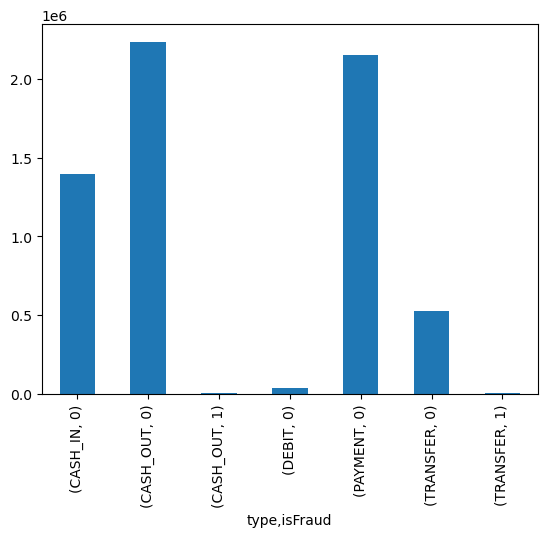

In [13]:
fraud_type=df.groupby(["type","isFraud"]).size().plot(kind="bar")
plt.show()

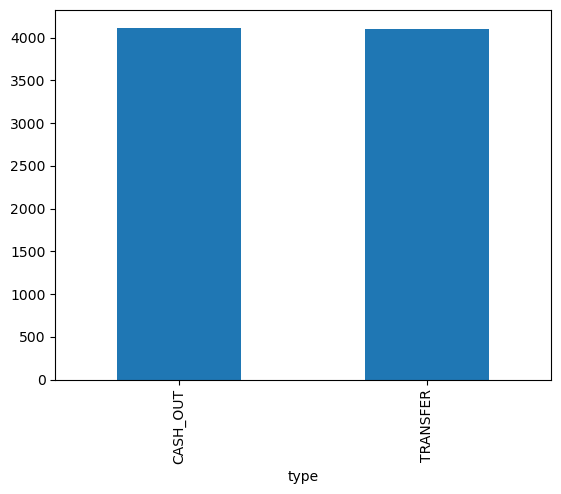

In [14]:
fraud=df["isFraud"].isin([1])
fraud_freq=df[fraud].groupby(["type"]).size().plot(kind="bar")
plt.show()

In [15]:
#only cash out and transfer are fraud.#changing others to all other types
df["type"].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [16]:
df["type"]=np.where(df["type"].isin(["PAYMENT" , "CASH_IN" , "DEBIT"] ),"others",df["type"])

In [17]:
df["type"].value_counts()

type
others      3592211
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

In [18]:
df=df[["type","amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud","isFlaggedFraud"]]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 388.3+ MB


In [20]:
X=df.drop(columns=["isFraud","isFlaggedFraud"],axis=1)

In [21]:
Y=df["isFraud"]

In [22]:
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,others,9839.64,170136.00,160296.36,0.00,0.00
1,others,1864.28,21249.00,19384.72,0.00,0.00
2,TRANSFER,181.00,181.00,0.00,0.00,0.00
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00
4,others,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00


In [23]:
dumies_type=pd.get_dummies(X["type"],prefix="type",drop_first=True,dtype=int)

In [24]:
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,others,9839.64,170136.00,160296.36,0.00,0.00
1,others,1864.28,21249.00,19384.72,0.00,0.00
2,TRANSFER,181.00,181.00,0.00,0.00,0.00
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00
4,others,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00


In [25]:
X=pd.concat([X,dumies_type],axis=1)

In [26]:
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_TRANSFER,type_others
0,others,9839.64,170136.00,160296.36,0.00,0.00,0,1
1,others,1864.28,21249.00,19384.72,0.00,0.00,0,1
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,0,0
4,others,11668.14,41554.00,29885.86,0.00,0.00,0,1
...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,0,0
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,0
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


In [27]:
X=X.drop(columns=["type"])

In [28]:
X

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_TRANSFER,type_others
0,9839.64,170136.00,160296.36,0.00,0.00,0,1
1,1864.28,21249.00,19384.72,0.00,0.00,0,1
2,181.00,181.00,0.00,0.00,0.00,1,0
3,181.00,181.00,0.00,21182.00,0.00,0,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,1
...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,0,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,0
6362618,850002.52,850002.52,0.00,0.00,0.00,1,0


In [29]:
X.corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_TRANSFER,type_others
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.365896,-0.200221
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,-0.081593,0.239063
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.087355,0.251988
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,0.130476,-0.155749
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.191701,-0.197130
type_TRANSFER,0.365896,-0.081593,-0.087355,0.130476,0.191701,1.000000,-0.344280
type_others,-0.200221,0.239063,0.251988,-0.155749,-0.197130,-0.344280,1.000000


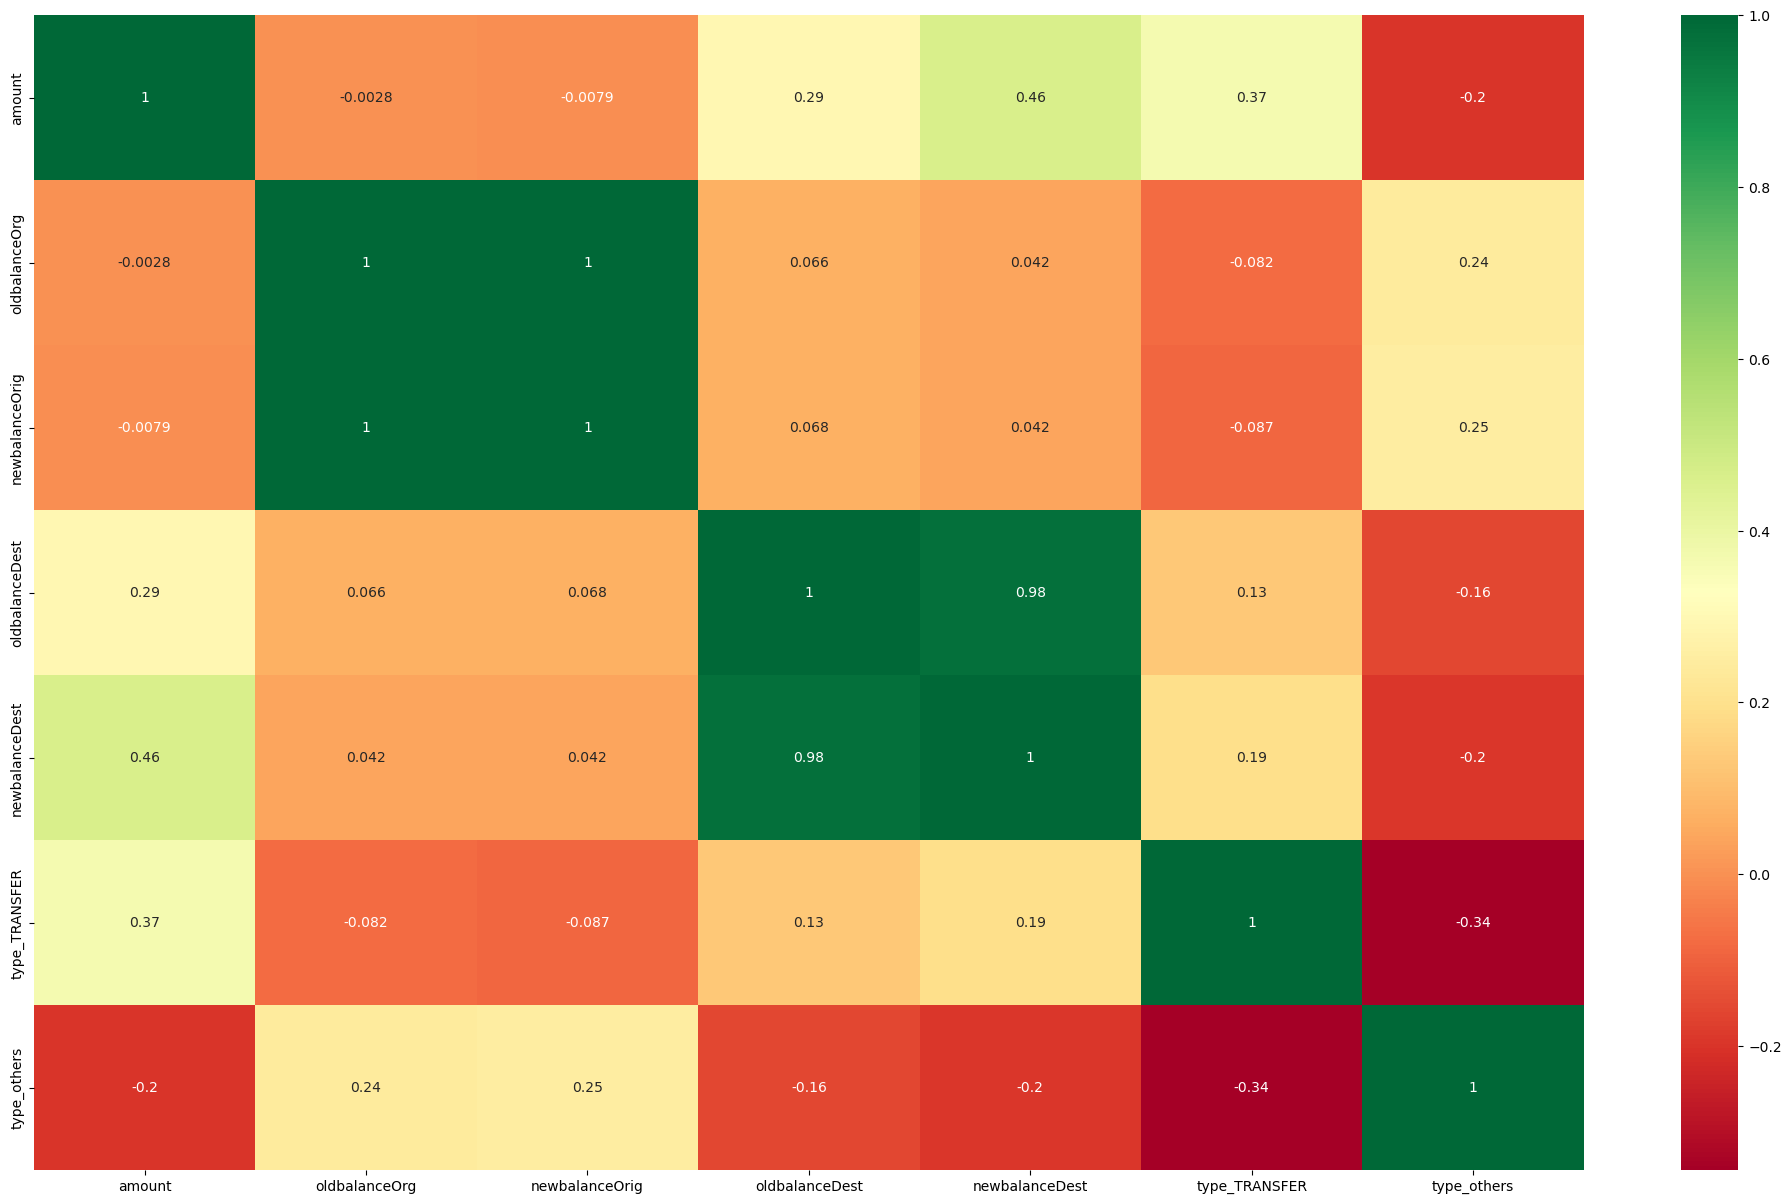

In [30]:
corr=X.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr,annot=True,cmap="RdYlGn")
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [32]:
X_train

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_TRANSFER,type_others
2276631,1607.27,0.00,0.00,0.00,0.00,0,1
1580855,16958.15,416.00,0.00,0.00,0.00,0,1
1080958,249226.07,11335.00,0.00,0.00,155927.95,0,0
4557677,217722.54,4383327.55,4601050.10,3507554.23,3289831.69,0,1
3092419,34150.62,5735503.44,5769654.06,228360.12,194209.50,0,1
...,...,...,...,...,...,...,...
5030793,156973.09,257335.00,100361.91,6697137.26,6854110.35,0,0
491263,140745.33,0.00,0.00,1880641.65,2021386.98,0,0
3937352,128095.40,0.00,0.00,8557281.75,8685377.15,0,0
4686059,5504.70,0.00,0.00,0.00,0.00,0,1


In [34]:
Y_train

2276631    0
1580855    0
1080958    0
4557677    0
3092419    0
          ..
5030793    0
491263     0
3937352    0
4686059    0
4322341    0
Name: isFraud, Length: 5090096, dtype: int64

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled= scaler.transform(X_test)

In [36]:
x_train_scaled

array([[1.73861325e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.83439399e-04, 6.98161816e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.69592382e-03, 1.90232312e-04, 0.00000000e+00, ...,
        4.37779397e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.38563128e-03, 0.00000000e+00, 0.00000000e+00, ...,
        2.43848468e-02, 0.00000000e+00, 0.00000000e+00],
       [5.95453430e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.47089069e-04, 3.73080221e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [37]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [38]:
#model=keras.Sequential()
#model.add(Dense(7,input_dim=7,activation="relu"))
#model.add(Dense(1,activation="sigmoid"))

C:\Users\023663\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
#model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
#model.compile(loss='binary_crossentropy',optimizer='adam')

In [63]:
#history = model.fit(x_train_scaled,Y_train, epochs=20,validation_split=0.2)

Epoch 1/20
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 385s 3ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 2/20
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 365s 3ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 3/20
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 399s 3ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 4/20
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 396s 3ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 5/20
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 365s 3ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 6/20
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 387s 3ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 7/20
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 328s 3ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 8/20
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 329s 3ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 9/20
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 328s 3ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 10/20
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 328s 3ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 11/20
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 331s 3ms/ste

In [65]:
#y_pred = model.predict(x_test_scaled)
#y_pred = (y_pred > 0.5)

39767/39767 ━━━━━━━━━━━━━━━━━━━━ 44s 1ms/step


In [66]:
#from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[1270789,      88],
       [    540,    1107]], dtype=int64)

In [67]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270877
           1       0.93      0.67      0.78      1647

    accuracy                           1.00   1272524
   macro avg       0.96      0.84      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524



In [55]:
Y_pred = model.predict(x_test_scaled)
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

39767/39767 ━━━━━━━━━━━━━━━━━━━━ 100s 3ms/step


0.6074065038143064

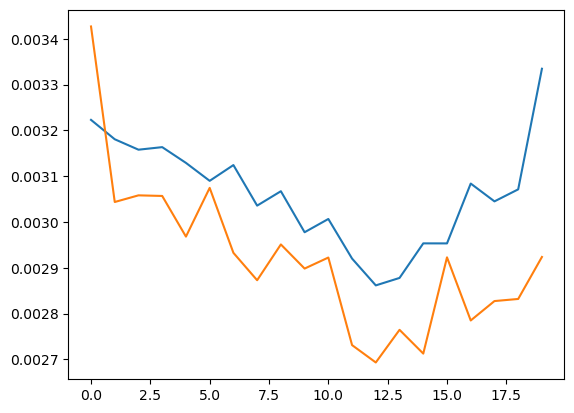

In [68]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [70]:
# after 20epoch also recall and f1 score for class 1 is not very good.

In [73]:
X.shape

(6362620, 7)

In [7]:
Y.shape

NameError: name 'Y' is not defined

In [3]:
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Print the class distribution
print('Original dataset shape %s' % Counter(Y))

# Apply SMOTE to the dataset
sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X, Y)

# Print the class distribution after applying SMOTE
print('Resampled dataset shape %s' % Counter(Y_res))

NameError: name 'Y' is not defined